In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

In [3]:
# 2. Đọc file csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMP.csv')
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index


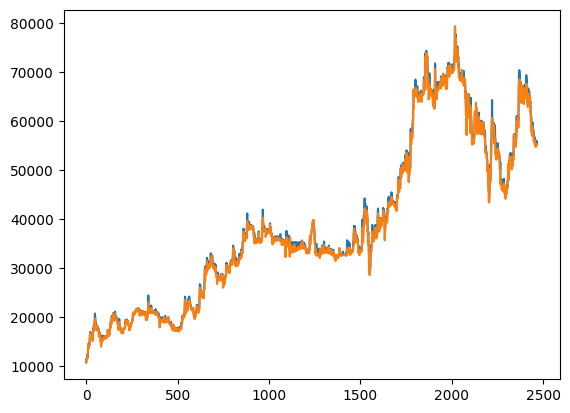

In [4]:
# 3. Gán biến
y = data[['close']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = data[['high']] # các biến độc lập

plt.plot(X)
plt.plot(y)
plt.show()

In [5]:
# 4. Chia train, test
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:train_size+test_size]
X_test = X[train_size:train_size+test_size]
y_val = y[train_size+test_size:]
X_val = X[train_size+test_size:]

In [6]:
# 5. Tạo mô hình SVR
svr_RBF = SVR(kernel='rbf', C=1000)
svr_RBF.fit(X_train, y_train)


SVR(C=1000)

In [7]:

# 6. Dự đoán giá đóng cửa trên tập kiểm tra
y_pred_RBF = svr_RBF.predict(X_test)
y_pred_RBF = y_pred_RBF.reshape(-1,1)
# Tập validate
y_pred_val_RBF = svr_RBF.predict(X_val)
y_pred_val_RBF = y_pred_val_RBF.reshape(-1,1)



In [8]:
# 7. Tính toán độ chính xác của mô hình
# Test
mae_RBF = mean_absolute_error(y_test, y_pred_RBF)
mape_RBF = mean_absolute_percentage_error(y_test, y_pred_RBF) * 100
r2_RBF = r2_score(y_test, y_pred_RBF)
test_rmse_RBF = np.sqrt(np.mean((y_pred_RBF - y_test)**2))
#Validate
mae_val_RBF = mean_absolute_error(y_val, y_pred_val_RBF)
mape_val_RBF = mean_absolute_percentage_error(y_val, y_pred_val_RBF) * 100
r2_val_RBF = r2_score(y_val, y_pred_val_RBF)
val_rmse_RBF = np.sqrt(np.mean((y_pred_val_RBF - y_val)**2))


In [9]:
# 8. In kết quả độ chính xác của mô hình
print("*********TEST**********")
print("RBF MAE:", mae_RBF)
print("RBF MAPE:", mape_RBF)
print("RBF R^2:",  r2_RBF)
print("RBF RMSE:", test_rmse_RBF)
print("*********VALIDATE**********")
print("RBF MAE:", mae_val_RBF)
print("RBF MAPE:", mape_val_RBF)
print("RBF R^2:",  r2_val_RBF)
print("RBF RMSE:", val_rmse_RBF)



*********TEST**********
RBF MAE: 29261.53722067933
RBF MAPE: 44.872084501408146
RBF R^2: -18.25884787055477
RBF RMSE: close    31617.288085
dtype: float64
*********VALIDATE**********
RBF MAE: 18784.89702942447
RBF MAPE: 31.146398747194365
RBF R^2: -10.10590553300338
RBF RMSE: close    22508.458712
dtype: float64


In [10]:
# 9. Láy giá trị Close của ngày cuối cùng trong dataset
last_row = data.tail(1)
last_data = last_row['close'].values.reshape(-1,1)
last_index =  data.index[-1]
last_distance = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


In [11]:
# 10. Tạo mảng chứa giá trị predict của 30 ngày tiếp theo
y_next_30_day_RBF = []

# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    y_pred_next = svr_RBF.predict(last_data)
    y_next_30_day_RBF.append(y_pred_next)
    last_data = y_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", y_next_30_day_RBF)


Kết quả dự đoán sử dụng RBF: [array([39111.82399106]), array([38736.10721101]), array([38374.3427185]), array([38028.63110589]), array([37700.19756919]), array([37389.49240568]), array([37096.34596336]), array([36820.13615006]), array([36559.94121796]), array([36314.66473687]), array([36083.12984923]), array([35864.14564008]), array([35656.55082588]), array([35459.24030045]), array([35271.17942154]), array([35091.40993343]), array([34919.05043915]), array([34753.29350433]), array([34593.40082719]), array([34438.69743124]), array([34288.56549768]), array([34142.43822003]), array([33999.79390538]), array([33860.15044239]), array([33723.0601893]), array([33588.10529338]), array([33454.8934284]), array([33323.05392307]), array([33192.23424648]), array([33062.09681483])]


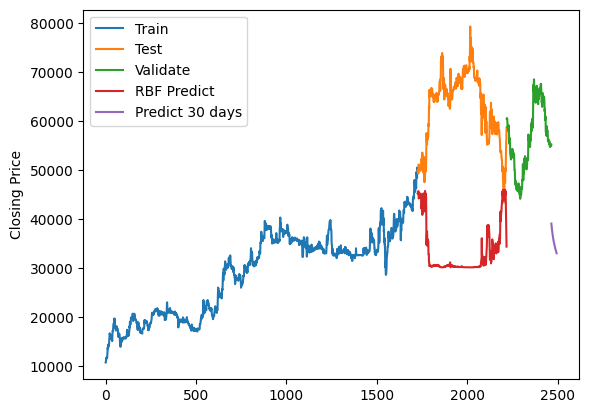

In [12]:
# 11. Vẽ mô hình
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_val, label='Validate')
plt.plot(X_test.index, y_pred_RBF, label='RBF Predict')
plt.plot(last_distance,y_next_30_day_RBF, label='Predict 30 days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()